In [1]:
%matplotlib inline

from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

In [23]:
cereal_df = pd.read_csv('Cereals.csv')

In [24]:
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [25]:
print(cereal_df.shape)
cereal_df = cereal_df.dropna()
print(cereal_df.shape)

(77, 16)
(74, 16)


In [26]:
cereal_df.set_index('name', inplace=True)

In [27]:
cols_to_norm = ['calories','protein','fat','sodium','fiber','carbo','potass','vitamins','shelf','weight','cups','rating']

In [28]:
cereal_df=cereal_df.drop(columns=['mfr','type'])

In [29]:
cereal_df_norm = cereal_df.apply(preprocessing.scale, axis=0)
print(cereal_df_norm)

                           calories   protein  fat    sodium     fiber  \
name                                                                     
100%_Bran                 -1.878652  1.391180  0.0 -0.393692  3.250706   
100%_Natural_Bran          0.658214  0.455295  4.0 -1.792572 -0.072986   
All-Bran                  -1.878652  1.391180  0.0  1.187651  2.835245   
All-Bran_with_Extra_Fiber -2.893399  1.391180 -1.0 -0.272050  4.912553   
Apple_Cinnamon_Cheerios    0.150841 -0.480589  1.0  0.214517 -0.280717   
...                             ...       ...  ...       ...       ...   
Triples                    0.150841 -0.480589  0.0  1.066009 -0.903910   
Trix                       0.150841 -1.416474  0.0 -0.272050 -0.903910   
Wheat_Chex                -0.356533  0.455295  0.0  0.822725  0.342475   
Wheaties                  -0.356533  0.455295  0.0  0.457800  0.342475   
Wheaties_Honey_Gold        0.150841 -0.480589  0.0  0.457800 -0.488448   

                              carbo  

Question 1 (3 points) Apply hierarchical clustering to the data using Manhattan distance to the normalized measurements. Compare the dendrograms from single linkage and complete linkage, and look at cluster centroids. Comment on the structure of the clusters and on their stability. Hint: See instructions for assignment 3 on how to calculate the cluster centroids.

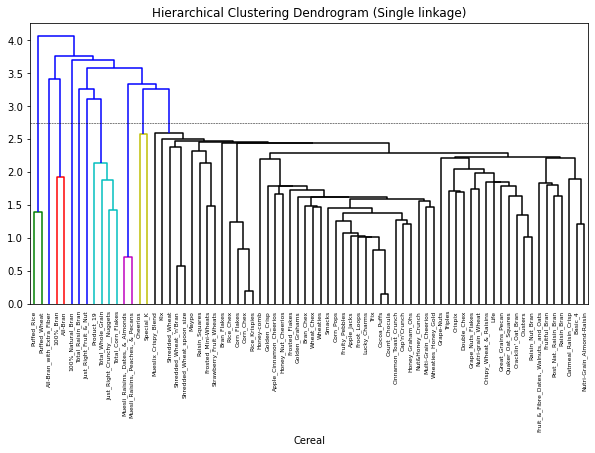

In [30]:
Z = linkage(cereal_df_norm, method='single')

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Single linkage)')
plt.xlabel('Cereal')
dendrogram(Z, labels=cereal_df_norm.index, color_threshold=2.75)
plt.axhline(y=2.75, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

In [10]:
Z = linkage(cereal_df_norm, method='complete')

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Complete linkage)')
plt.xlabel('Cereal')
dendrogram(Z, labels=cereal_df_norm.index, color_threshold=2.75)
plt.axhline(y=2.75, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

ValueError: The condensed distance matrix must contain only finite values.

In [11]:
cereal_df = cereal_df.apply(lambda x: x.astype('float64'))

In [12]:
memb = fcluster(linkage(cereal_df_norm, method='complete', metric='cityblock'), 5, criterion='maxclust')
centroids = {}
for key, item in df.groupby(memb):
    centroids[key] = item.mean()
    print('Cluster {}: size {}'.format(key, len(item)))
pd.DataFrame(centroids).transpose().round(2)

ValueError: The condensed distance matrix must contain only finite values.

In [18]:
memb = fcluster(linkage(cereal_df_norm, method='single'), 6, criterion='maxclust') 

ValueError: The condensed distance matrix must contain only finite values.